### Import Libraries

In [1]:
# Import necessary libraries for data analysis and visualization
import numpy as np  # Numerical computations
import pandas as pd  # Data manipul* ation
import matplotlib.pyplot as plt  # Visualizations
import seaborn as sns  # Advanced visualizations

### Read Data

In [2]:
data = pd.read_csv("C:/Users/muge/Dropbox/GMU/Portfolio/AIT 580/Movies/cleaned_movies_data.csv")

In [3]:
#1. Check the structure of the dataset:
#Look for missing values, data types, and basic statistics.
# Check the data types and missing values
data.info()

# Display basic statistics for numerical columns
data.describe()

# Check for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   2544 non-null   object 
 1   US Gross                2544 non-null   float64
 2   Worldwide Gross         2544 non-null   float64
 3   US DVD Sales            2544 non-null   float64
 4   Production Budget       2544 non-null   float64
 5   Release Date            2537 non-null   object 
 6   MPAA Rating             2452 non-null   object 
 7   Running Time (min)      2544 non-null   float64
 8   Distributor             2544 non-null   object 
 9   Source                  2544 non-null   object 
 10  Major Genre             2544 non-null   object 
 11  Creative Type           2544 non-null   object 
 12  Director                2544 non-null   object 
 13  Rotten Tomatoes Rating  2544 non-null   float64
 14  IMDB Rating             2544 non-null   

Title                      0
US Gross                   0
Worldwide Gross            0
US DVD Sales               0
Production Budget          0
Release Date               7
MPAA Rating               92
Running Time (min)         0
Distributor                0
Source                     0
Major Genre                0
Creative Type              0
Director                   0
Rotten Tomatoes Rating     0
IMDB Rating                0
IMDB Votes                 0
Release Year               7
Profit                     0
ROI                        0
dtype: int64

In [4]:
# Convert 'Release Date' back to datetime
data["Release Date"] = pd.to_datetime(data["Release Date"], errors='coerce')

# Convert 'MPAA Rating' back to category
rating_order = ["unknown", "g", "pg", "pg-13", "r", "nc-17"]
data["MPAA Rating"] = pd.Categorical(data["MPAA Rating"], categories=rating_order, ordered=True)

# Confirm the data types
print(data.dtypes)

Title                             object
US Gross                         float64
Worldwide Gross                  float64
US DVD Sales                     float64
Production Budget                float64
Release Date              datetime64[ns]
MPAA Rating                     category
Running Time (min)               float64
Distributor                       object
Source                            object
Major Genre                       object
Creative Type                     object
Director                          object
Rotten Tomatoes Rating           float64
IMDB Rating                      float64
IMDB Votes                       float64
Release Year                     float64
Profit                           float64
ROI                              float64
dtype: object


### Step 1: Define Success Criteria

Let's define the target variable success based on whether the Worldwide Gross exceeds $100 million.

In [5]:
# Define success criteria: 1 for successful, 0 for unsuccessful
threshold = 100000000  # $100 million threshold
data['success'] = (data['Worldwide Gross'] > threshold).astype(int)

### Step 2: Data Preprocessing

We will:

* Handle missing values.
* Convert categorical features (like Release Date, MPAA Rating, Distributor) into numerical format.
* Use numerical features like US Gross, Production Budget, Rotten Tomatoes Rating, etc.

In [6]:
# Handle missing values by imputing them with the mean (or other strategies depending on the column)
data['Release Date'] = pd.to_datetime(data['Release Date'], errors='coerce')  # Convert 'Release Date' to datetime
data['Release Year'] = data['Release Date'].dt.year  # Extract year from release date

# Handle missing 'MPAA Rating' by filling with a placeholder (like 'Unknown')
data['MPAA Rating'] = data['MPAA Rating'].astype('category')  # Ensure it's categorical
data['MPAA Rating'] = data['MPAA Rating'].cat.add_categories('Unknown')  # Add 'Unknown' as a valid category
data['MPAA Rating'].fillna('Unknown', inplace=True)  # Now fill missing values with 'Unknown'

# Convert categorical variables into numerical values using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['MPAA Rating'] = le.fit_transform(data['MPAA Rating'])
data['Distributor'] = le.fit_transform(data['Distributor'])
data['Source'] = le.fit_transform(data['Source'])
data['Major Genre'] = le.fit_transform(data['Major Genre'])
data['Creative Type'] = le.fit_transform(data['Creative Type'])
data['Director'] = le.fit_transform(data['Director'])

# Define features and target
X = data[['US Gross', 'Worldwide Gross', 'US DVD Sales', 'Production Budget', 'Running Time (min)', 
          'Rotten Tomatoes Rating', 'IMDB Rating', 'IMDB Votes', 'Release Year', 
          'MPAA Rating', 'Distributor', 'Source', 'Major Genre', 'Creative Type', 'Director']]  # Features
y = data['success']  # Target: Success (1) or Unsuccessful (0)

# Handle missing values for any remaining features
X.fillna(X.mean(), inplace=True)  # Fill missing values in numerical columns with the mean

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\muge\AppData\Local\Temp\ipykernel_10548\699676475.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)  # Fill missing values in numerical columns with the mean


### Step 3: Train the Classification Model

Let's use Random Forest Classifier for this task. It’s a powerful model for classification problems and can handle both numerical and categorical features well.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 99.80%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       457
           1       1.00      0.98      0.99        52

    accuracy                           1.00       509
   macro avg       1.00      0.99      0.99       509
weighted avg       1.00      1.00      1.00       509

Confusion Matrix:
[[457   0]
 [  1  51]]


* Accuracy: 99.80% is excellent and indicates that the model is performing well overall.
* Classification Report:
    * Precision, recall, and F1-score for both classes (0 and 1) are also strong, with very high values, especially for class 0.
    * The recall for class 1 is slightly lower at 0.98, which means it is missing a few positive cases (false negatives), but this is still very good.
* Confusion Matrix:
    * The confusion matrix shows that the model has very few false positives (0) and false negatives (1), which further supports the high performance of the model.  


### Step 4: Model Evaluation

Evaluate the model using accuracy, precision, recall, F1-score, and the confusion matrix:

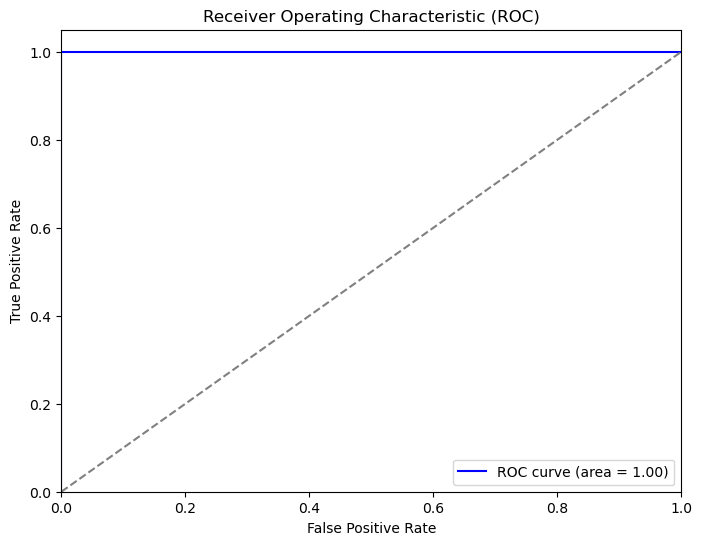

In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

This chart is a Receiver Operating Characteristic (ROC) curve with an Area Under the Curve (AUC) of 1.00. Let's break down what this means:

Understanding ROC Curves:
* Purpose: ROC curves are used to evaluate the performance of binary classification models (models that predict one of two outcomes, like "yes/no" or "true/false").

Interpretation:
* The ROC curve plots the TPR against the FPR at various threshold settings.
* A good model will have a curve that is closer to the top-left corner of the graph, indicating a high TPR and a low FPR.
* A poor model will have a curve that is closer to the diagonal line (the dashed line in this case), indicating that the model's performance is no better than random guessing.

Understanding AUC (Area Under the Curve):
* Purpose: The AUC is a single value that summarizes the overall performance of the model.

Interpretation:
* An AUC of 1.00 indicates a perfect model that can perfectly distinguish between positive and negative cases.
* An AUC of 0.5 indicates a model that performs no better than random guessing.
* An AUC between 0.5 and 1.0 indicates a model that performs better than random guessing, with higher values indicating better performance.

Interpretation of This Specific Chart:
* Perfect Model: The ROC curve in this chart is a straight line along the top edge of the graph, and the AUC is 1.00. This indicates a perfect model.
* No Errors: The model is able to perfectly distinguish between positive and negative cases at all threshold settings. There are no false positives and no false negatives.
* Ideal Scenario: This is the ideal scenario for a classification model, but it is rarely achieved in real-world applications. It may suggest that the data is very simple, or that there is something wrong with the dataset or the model.

Key Takeaways:
* Perfect Classification: The model is a perfect classifier.
* AUC of 1.00: The AUC confirms the perfect performance.
* Possible Overfitting or Data Issues: A perfect ROC curve and AUC of 1.00 should raise suspicion. It could indicate that the model is overfitting the training data, or that there is an issue with the dataset (e.g., duplicate data, data leakage).

This chart shows a perfect ROC curve, indicating a perfect classification model. However, it's crucial to investigate the data and model to ensure that this result is valid and not due to overfitting or data issues.